In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('data/서울시 코로나19 확진자 현황.csv')

/Users/cutecom/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  category      
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(3)
memory usage: 3.9+ MB


In [21]:
df['여행력'].unique()

array([nan, '나이지리아', '영국', '싱가폴', '프랑스', '러시아', '헝가리', '아랍에메리트', '중국',
       '우즈베키스탄', '베트남', '필리핀', '미국', '카자흐스탄', '피지', '일본', ' ', '세르비아',
       '몽골', '영국미국', '미얀마', '모로코', '사우디', '캄보디아', '폴란드', '몽고', '독일',
       '인도네시아', '스위스', '이란', '리비아', '태국', ' 우즈베키스탄', '인도', ' 키르기즈스탄',
       '캐나다', '모잠비크', '파키스탄', '이라크', '방글라데시', '터키', '스페인', '아랍에미리트',
       '일본터키', '멕시코', '튀니지', '체코', '우크라이나', '네덜란드', '아르메니아', '몰타', '스웨덴',
       '아이보리코스트', '과테말라', '브라질', '에스토니아', '아르헨티나', '슬로바키아', '세네갈', '불가리아',
       '조지아', '키르기스스탄', '스리랑카', '파라과이', '가나', '모스크바', '네팔', '아프리카 말라위',
       '말레이시아', '자카르타', '케냐', '쿠웨이트', 'UAE', '타지키스탄', '도미니카공화국', '아프카니스탄',
       '시에라리온', '  ', '핀란드', '콜롬비아', '덴마크', '인도 ', '오만', '아프가니스탄', '아일랜드',
       '이스라엘', '남아프리카공화국', '잠비아', '미국 ', '이집트', '짐바브웨', '방글라데시아랍에미리트',
       '사우디아라비아', '마케도니아', '중국(시안)', '파푸아뉴기니(포트모르즈비)', '파푸아뉴기니', '페루',
       '21.4.7', '강릉', '아랍에미레이트', '수단', '중국(장춘)', '아랍에미리트연합', '필리핀 ',
       '카타르', '인도 델리', '멕시코(미국경유)', '오스트리아', '베네수엘라', '베트남 사이공', '체

In [22]:
df.drop(columns=['환자번호','국적','환자정보','조치사항','이동경로','등록일','수정일','노출여부'], inplace=True)

In [23]:
df

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-
...,...,...,...,...,...,...
99545,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원
99546,4,2020-01-30,마포구,중국,해외유입,퇴원
99547,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원
99548,2,2020-01-30,중랑구,중국,해외유입,퇴원


## 자료형 변환

In [24]:
df.dtypes

연번      int64
확진일    object
지역     object
여행력    object
접촉력    object
상태     object
dtype: object

In [25]:
df['확진일'] = pd.to_datetime(df['확진일'])

In [26]:
df['지역'].nunique()

29

In [27]:
df['지역'].unique()

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구',
       '타시도 ', ' 성북구'], dtype=object)

In [28]:
# 지역의 공백 제거

df['지역'] = df['지역'].str.strip()

In [29]:
# 지역, 상태 --> category

df['지역'] = df['지역'].astype('category')

In [30]:
df.dtypes

연번              int64
확진일    datetime64[ns]
지역           category
여행력            object
접촉력            object
상태             object
dtype: object

In [31]:
df.isnull().sum()

연번         0
확진일        0
지역         0
여행력    97833
접촉력        0
상태         0
dtype: int64

# 구 별 확진자 동향(피벗테이블)

In [32]:
df_gu = pd.pivot_table(df, index= '확진일', columns= '지역', values='연번', aggfunc='count', margins=True)
df_gu

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,...,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도,All
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24 00:00:00,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-01-30 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,3
2020-01-31 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,3
2020-02-02 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2020-02-05 00:00:00,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-25 00:00:00,37,41,42,48,37,34,31,39,0,27,...,88,20,35,32,31,31,24,35,31,928
2021-09-26 00:00:00,43,17,27,29,37,37,72,19,0,25,...,55,12,40,13,38,33,27,26,32,778
2021-09-27 00:00:00,50,29,20,50,23,34,58,16,0,37,...,58,27,41,28,17,20,22,18,63,842


### 서울시 일별 확진자 동향

In [33]:
s_date = df_gu['All'][:-1]

In [34]:
# 서울시 일별 추가확진자가 많았던 순으로 보기

s_date.sort_values(ascending=False)

확진일
2021-09-24    1222
2021-09-28    1054
2021-09-25     928
2021-09-23     905
2021-09-27     842
              ... 
2020-04-24       1
2020-04-30       1
2020-05-01       1
2020-05-17       1
2020-01-24       1
Name: All, Length: 582, dtype: int64

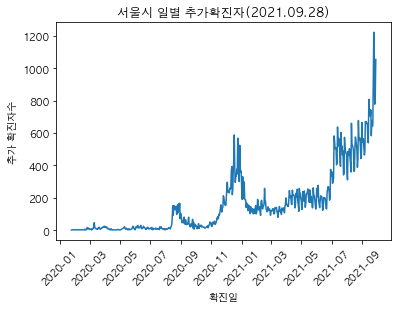

In [35]:
# 서울시 일별 추가확진자 시각화

x = s_date.index
y = s_date.values
plt.plot(x,y)
plt.title('서울시 일별 추가확진자(2021.09.28)')
plt.xlabel('확진일')
plt.ylabel('추가 확진자수')
plt.xticks(rotation=45)
plt.show()

In [10]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

mpl.rcParams['axes.unicode_minus']=False

plt.rcParams['font.family']= 'AppleGothic'


In [38]:
# 서울시 구별 누적확진자 많은 순으로 보기
s_gu = df_gu.loc['All'][:-1]
s_gu = s_gu.sort_values(ascending=False)
s_gu

지역
강남구     6926
송파구     6356
관악구     5418
타시도     4715
영등포구    4463
강서구     4447
은평구     4284
서초구     4284
구로구     4168
동작구     4120
노원구     3932
강동구     3782
성북구     3779
중랑구     3729
마포구     3726
동대문구    3487
광진구     3486
양천구     3291
성동구     2839
용산구     2705
서대문구    2692
강북구     2606
도봉구     2605
기타      2321
금천구     2064
중구      1708
종로구     1617
Name: All, dtype: int64

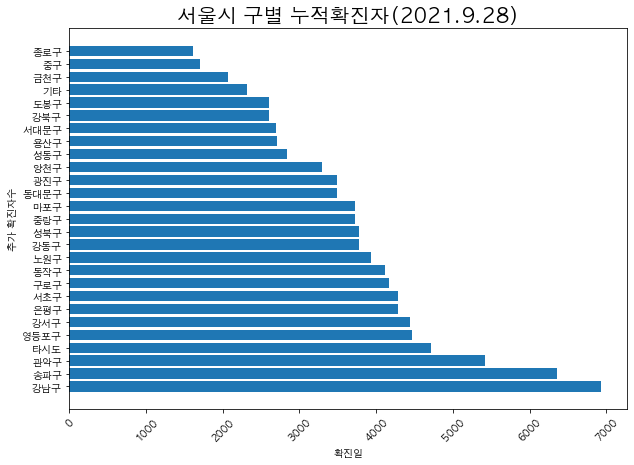

In [44]:
x = s_gu.index
y = s_gu.values

plt.figure(figsize=(10,7))  # 꼭 위에다 적어주어야함
plt.barh(x,y)
plt.title('서울시 구별 누적확진자(2021.9.28)', size=20)
plt.xticks(rotation=45)
plt.show()

In [49]:
s_gu = df_gu.iloc[-2][:-1]
s_gu = s_gu.sort_values(ascending=False)

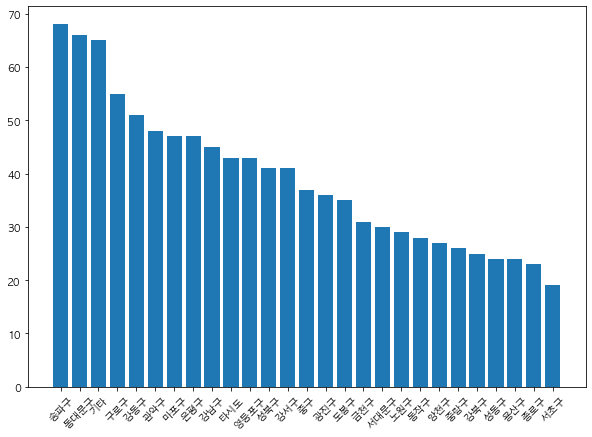

In [51]:
x = s_gu.index
y = s_gu.values

plt.figure(figsize=(10,7))  # 꼭 위에다 적어주어야함
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

In [55]:
df['접촉력'].value_counts()[:10].to_frame()

,접촉력
기타 확진자 접촉,37943
감염경로 조사중,31964
타시도 확진자 접촉,4244
해외유입,1729
동부구치소 관련,1175
병원 및 요양시설,988
송파구 소재 시장 관련(?21.9.),659
성북구 사랑제일교회 관련,641
중구 소재 시장 관련(?21.9.),277
강서구 교회 관련,246


In [63]:
df[(df['확진일'].dt.year==2021)&(df['확진일'].dt.month==9)]['접촉력'].value_counts()[:10].to_frame()

,접촉력
감염경로 조사중,8117
기타 확진자 접촉,8088
송파구 소재 시장 관련(?21.9.),658
타시도 확진자 접촉,587
중구 소재 시장 관련(?21.9.),277
병원 및 요양시설,186
해외유입,122
용산구 소재 병원 관련(?21.9.),77
동대문구 소재 시장 관련,44
강서구 소재 시장 관련,44
